## Instructions  
This notebook simply prints and plots the outputs generated with `ex1.1/main`, `ex1.2/main` and `ex1.3/main`. To compile and run, simply do, in the directory of this notebook:

`make && ./run.sh`

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1.1

## Part 1

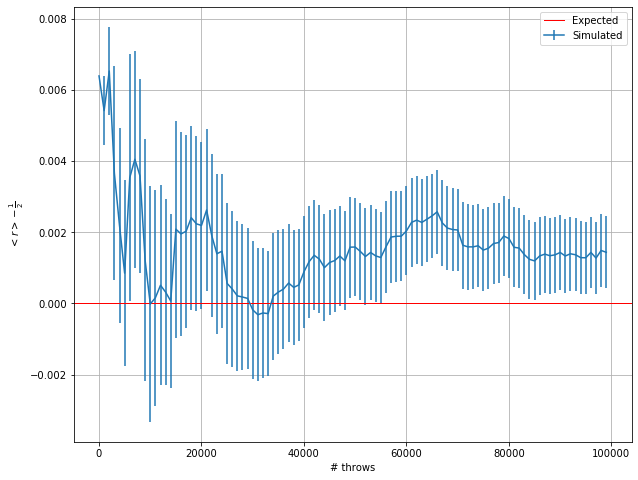

In [4]:
n, progress_sum, error = np.loadtxt("ex1.1/sampling.txt", delimiter="\t", unpack=True)
plt.figure(figsize=(10,8))
plt.axhline(y=0, color='r', linestyle='-', lw=1, label="Expected")
plt.errorbar(n, progress_sum-0.5,yerr=error, label="Simulated")
plt.legend()
plt.xlabel('# throws')
plt.ylabel(r'$<r>-\frac{1}{2}$')
plt.grid(True)
plt.show()

Note that in this graph (and usually also in the others) I have plotted on the $x$ axis the number of throws and not the number of blocks. 

## Part 2

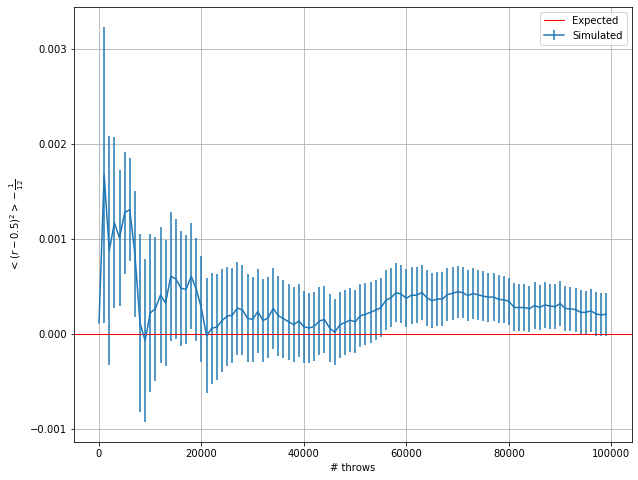

In [3]:
n, progress_sum, error = np.loadtxt("ex1.1/sampling2.txt", delimiter="\t", unpack=True)
plt.figure(figsize=(10,8))
plt.axhline(y=0, color='r', linestyle='-', lw=1, label="Expected")
plt.errorbar(n, progress_sum-1/12,yerr=error, label="Simulated")
plt.legend()
plt.xlabel('# throws')
plt.ylabel(r'$<(r-0.5)^2>-\frac{1}{12}$')
plt.grid(True)
plt.show()

## Part 3

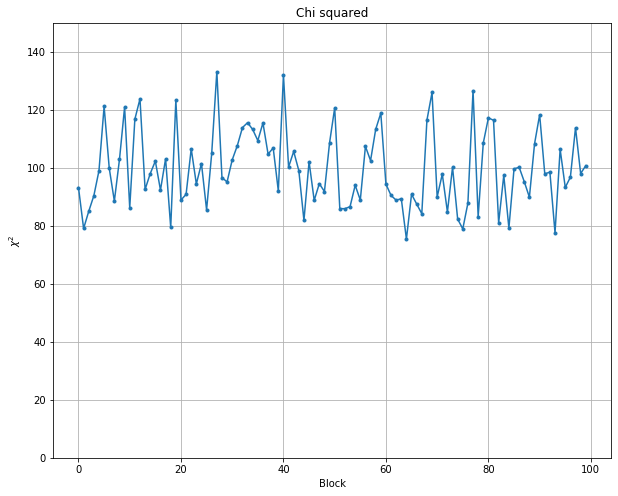

Mean value of chi^2 is:  99.5756


In [11]:
chi = np.loadtxt("ex1.1/chi.txt", delimiter="\t", unpack=True)
plt.figure(figsize=(10,8))
plt.plot(chi, linestyle="-", marker=".")
plt.xlabel('Block')
plt.ylabel(r'$\chi^2$')
plt.ylim((0,150))
plt.grid(True)
plt.title("Chi squared")
plt.show()
print("Mean value of chi^2 is: ", np.mean(chi))

# Exercise 1.2

## Central limit theorem

1.41666


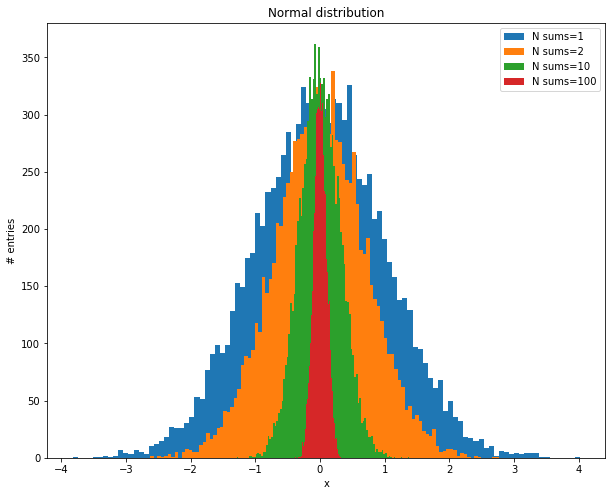

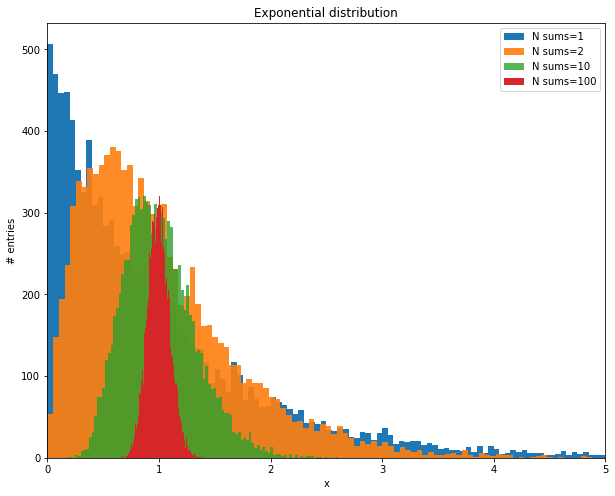

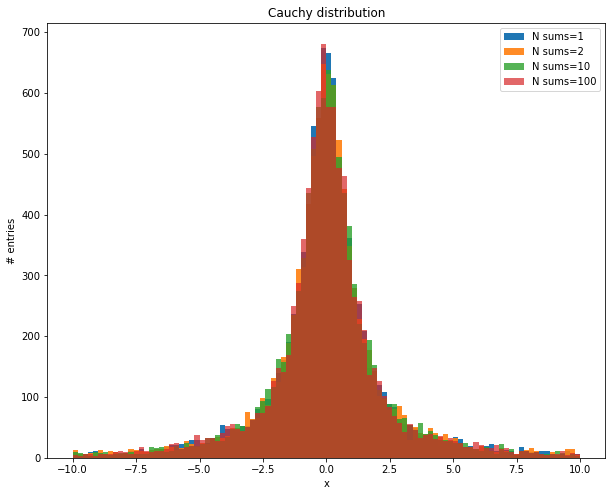

In [3]:
from scipy.optimize import curve_fit
#functions for fitting
def gauss(x,a,x0,sigma): 
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) 
def cauchy(x, i, x0, gamma): 
    return i*(gamma**2/((x-x0)**2+gamma**2)) 
#function for finding mean x value of a bin
def mean_bin(x):
    pass
    

gauss, expn, cauchy, gauss2, expn2, cauchy2, gauss10, expn10, cauchy10, gauss100, expn100, cauchy100=np.loadtxt("ex1.2/distributions.txt", delimiter="\t", unpack=True)

#change it at your wish
density=False

plt.figure(figsize=(10,8))
n, bins, patch=plt.hist(gauss, bins=100, density=density, label="N sums=1")
n, bins, patch=plt.hist(gauss2, bins=100, density=density, label="N sums=2")
n, bins, patch=plt.hist(gauss10, bins=100, density=density, label="N sums=10")
n, bins, patch=plt.hist(gauss100, bins=100,density=density, label="N sums=100")
plt.legend()
plt.xlabel("x")
plt.ylabel("# entries")
plt.title("Normal distribution")


fig=plt.figure(figsize=(10,8))
axes=fig.subplots()
axes.set_xlim([0,5])

n, bins, patch=plt.hist(expn, bins=100, alpha=1,label="N sums=1", density=density, range=(-0,5))
n, bins, patch=plt.hist(expn2, bins=100, alpha=0.9, density=density, label="N sums=2")
n, bins, patch=plt.hist(expn10, bins=100, alpha=0.8, density=density,  label="N sums=10")
n, bins, patch=plt.hist(expn100, bins=100, density=density,  label="N sums=100")
print(np.max(bins))

plt.legend()
plt.xlabel("x")
plt.ylabel("# entries")
plt.title("Exponential distribution")

plt.figure(figsize=(10,8))
#plt.subplots(2,2)
range=(-10,10)
n, bins, patch=plt.hist(cauchy, bins=100, range=range, density=density,label="N sums=1")
n, bins, patch=plt.hist(cauchy2, bins=100, range=range,density=density, alpha=0.9, label="N sums=2")
n, bins, patch=plt.hist(cauchy10, bins=100, range=range,density=density, alpha=0.8, label="N sums=10")
n, bins, patch=plt.hist(cauchy100, bins=100, range=range, density=density,alpha=0.7, label="N sums=100")
plt.xlabel("x")
plt.ylabel("# entries")
plt.title("Cauchy distribution")
plt.legend()
plt.show()

The central limit theorem it's clearly "verified" in those plots. Exponential and gaussian both converge to a gaussian. The Lorentzian, instead, keeps it shape and doesn't change. For a different visualization, change the line `density=False` to `density=True`: you will see the distributions plotted normalized.

# Exercize 1.3

## Pi value

In this exercise I have used the following "strategy". In order not to use the value of pi, two quantities are picked at random: the value of the barycenter of the stick is drawn from an uniform distribution between 0 and D (distance of two lines); then a point is generated uniformly inside a semicircle in order to compute a uniform distribution  between 0 and pi (throght it's cosine: $\frac{x}{x^2+y^2}$). Finally it is checked if the stick with this barycenter and angle intersects the lines.

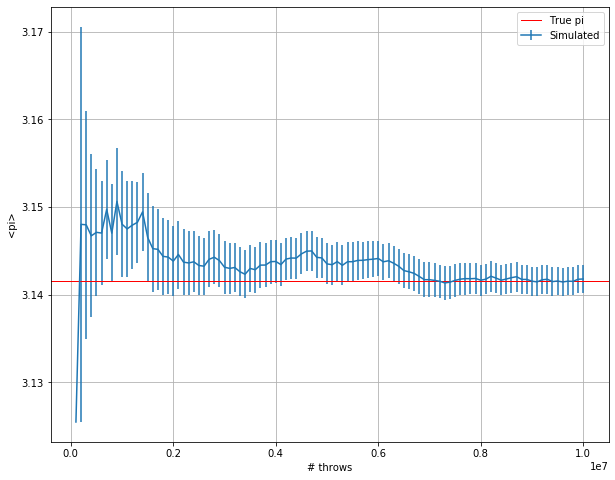

In [5]:
n, pi, err=np.loadtxt("ex1.3/pi.txt", delimiter="\t",unpack=True)
fig=plt.figure(figsize=(10,8))
ax=plt.subplot()
#ax.set_xscale("log", nonposx='clip')

plt.axhline(y=np.pi, color='r', linestyle='-', lw=1, label="True pi")
plt.errorbar(n, pi,yerr=err, label="Simulated")
plt.legend()
plt.grid(True)
plt.xlabel("# throws")
plt.ylabel("<pi>")
plt.show()